In [1]:
import warnings
warnings.filterwarnings('ignore')

import plotly.graph_objects as go
import plotly.express as px

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, accuracy_score, roc_auc_score, f1_score,recall_score, roc_curve, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC

import joblib


In [2]:
new_df = pd.read_csv('insured_claims_cleaned.csv')

In [3]:
# separate the target column from the features

X = new_df.drop('fraud_reported', axis=1)
y = new_df['fraud_reported']

In [4]:
X

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,...,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen
0,328,48,1000,1406.91,0,53300,0,1,1,2,...,0,0,0,0,0,0,1,0,0,0
1,228,42,2000,1197.22,5000000,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,134,29,2000,1413.14,5000000,35100,0,3,2,3,...,1,0,0,0,0,0,0,0,0,0
3,256,41,2000,1415.74,6000000,48900,-62400,1,1,2,...,0,0,0,0,0,0,0,0,0,0
4,228,44,1000,1583.91,6000000,66000,-46000,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
996,285,41,1000,1436.79,0,70900,0,1,2,3,...,0,0,0,0,0,0,0,0,0,1
997,130,34,500,1383.49,3000000,35100,0,3,2,3,...,0,0,0,0,0,0,0,1,0,0
998,458,62,2000,1356.92,5000000,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 110 entries, months_as_customer to auto_make_Volkswagen
dtypes: float64(1), int64(109)
memory usage: 859.5 KB


In [6]:
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int64

## Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.2,random_state = 123)

In [9]:
X_train.shape

(800, 110)

## Logistic Regression

In [10]:
lr = LogisticRegression(class_weight="balanced", solver="liblinear", random_state=42)

lr.fit(X_train, y_train)
preds = lr.predict(X_test)

score = lr.score(X_test, y_test)
print(score)

0.815


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       155
           1       0.57      0.71      0.63        45

    accuracy                           0.81       200
   macro avg       0.74      0.78      0.75       200
weighted avg       0.83      0.81      0.82       200



## SMOTE

In [12]:
oversample = SMOTE(random_state=9)
X_over, y_over = oversample.fit_resample(X_scaled, y)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, random_state = 1)

## Logistic Regression after SMOTE - Oversampling

In [14]:
lr.fit(X_train, y_train)
preds = lr.predict(X_test)
score = lr.score(X_test, y_test)
print(score)
print()
print(classification_report(y_test, preds))

0.843501326259947

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       201
           1       0.82      0.85      0.84       176

    accuracy                           0.84       377
   macro avg       0.84      0.84      0.84       377
weighted avg       0.84      0.84      0.84       377



## Decision Tree Classifier

In [15]:
dtc = DecisionTreeClassifier(class_weight="balanced")

dtc.fit(X_train, y_train)
preds = dtc.predict(X_test)

score = dtc.score(X_test, y_test)
print(score)
print()
print(classification_report(y_test, preds))

0.8461538461538461

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       201
           1       0.83      0.85      0.84       176

    accuracy                           0.85       377
   macro avg       0.85      0.85      0.85       377
weighted avg       0.85      0.85      0.85       377



## Random Forest Classifier

In [16]:
rfc = RandomForestClassifier(class_weight="balanced", n_estimators=100, random_state = 42, n_jobs=-1)
rfc.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [17]:
preds = rfc.predict(X_test)

score = rfc.score(X_test, y_test)
print(score*100)
print()
print(classification_report(y_test, preds))

87.79840848806366

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       201
           1       0.85      0.90      0.87       176

    accuracy                           0.88       377
   macro avg       0.88      0.88      0.88       377
weighted avg       0.88      0.88      0.88       377



## SVC 

In [18]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

preds = svc.predict(X_test)

score = svc.score(X_test, y_test)
print(score)
print()
print(classification_report(y_test, preds))

0.8620689655172413

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       201
           1       0.84      0.88      0.86       176

    accuracy                           0.86       377
   macro avg       0.86      0.86      0.86       377
weighted avg       0.86      0.86      0.86       377



## GradientBoostClassifier

In [19]:
gradient = GradientBoostingClassifier(loss='exponential',learning_rate = 0.2,n_estimators=500,
                                      subsample=0.5,criterion='friedman_mse',
                                     min_samples_leaf=3,min_weight_fraction_leaf=0.1,
                                     max_depth=4,min_impurity_decrease=0.1,
                                     random_state=2,max_features='auto',max_leaf_nodes=5,
                                     warm_start=True,validation_fraction=0.1)
gradient.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='exponential', max_depth=4,
                           max_features='auto', max_leaf_nodes=5,
                           min_impurity_decrease=0.1, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=2,
                           min_weight_fraction_leaf=0.1, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=True)

In [20]:
preds = gradient.predict(X_test)

score = gradient.score(X_test, y_test)
print(score*100)
print()
print(classification_report(y_test, preds))

84.88063660477454

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       201
           1       0.84      0.83      0.84       176

    accuracy                           0.85       377
   macro avg       0.85      0.85      0.85       377
weighted avg       0.85      0.85      0.85       377



## Hyperparametertuning Random Forest and SVC

In [21]:
from sklearn.model_selection import GridSearchCV

n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyper = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

grid = GridSearchCV(rfc, hyper, cv = 3, verbose = 1, 
                      n_jobs = -1)
best = grid.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 10.8min finished


In [22]:
print(best)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=42,
                              

In [23]:
rfc_tuned = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False)

rfc_tuned.fit(X_train, y_train)
preds_tuned = rfc_tuned.predict(X_test)

print('Score:' , rfc_tuned.score(X_test, y_test))
print('')
print(classification_report(y_test, preds_tuned))


Score: 0.8779840848806366

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       201
           1       0.85      0.89      0.87       176

    accuracy                           0.88       377
   macro avg       0.88      0.88      0.88       377
weighted avg       0.88      0.88      0.88       377



In [24]:
degrees = [2,3,4,5,6,7,8]
kernels = ['poly', 'rbf', 'sigmoid']
c_value = [1,2,3]

scores = {}
for degree in degrees:
    for kernel in kernels:
        for c in c_value:
            svc_t = SVC(kernel = kernel, degree = degree, C = c)
            svc_t.fit(X_train, y_train)
            
            preds = svc_t.predict(X_test)
            score = svc_t.score(X_test,y_test)
#             print('Score with degree as {d}, kernel as {k}, C as {c} is:'.format(d = degree, k = kernel, c = c), score)
            scores['Score with degree as {d}, kernel as {k}, C as {c} is best'.format(d = degree, k = kernel, c = c)] = score

print(max(scores, key=scores.get))

Score with degree as 6, kernel as poly, C as 1 is best


In [25]:
svc_tuned = SVC(kernel='poly', degree = 6, C = 1, probability=True)
svc_tuned.fit(X_train, y_train)

preds = svc_tuned.predict(X_test)

print('Score:' , svc_tuned.score(X_test, y_test))
print('')
print(classification_report(y_test, preds))

Score: 0.9204244031830239

              precision    recall  f1-score   support

           0       0.99      0.86      0.92       201
           1       0.86      0.99      0.92       176

    accuracy                           0.92       377
   macro avg       0.93      0.93      0.92       377
weighted avg       0.93      0.92      0.92       377



<hr>

### Final Model Visualization

In [26]:
ypr = svc_tuned.predict(X_test)
trial = pd.DataFrame({'actual': y_test, 'pred': ypr}, dtype='int64')
trial.sort_values('actual',inplace=True)
trial.reset_index(inplace=True)
trial

,index,actual,pred
0,680,0,0
1,902,0,0
2,231,0,0
3,675,0,0
4,390,0,0
...,...,...,...
372,1154,1,1
373,1454,1,1
374,1271,1,1
375,703,1,1


### Check Confusion Matrix from Best Model Trained

TP:  175
TN:  172
FP:  29
FN:  1


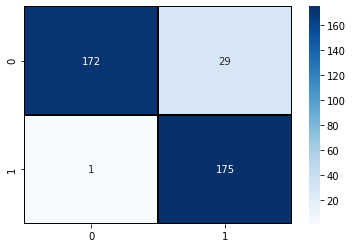

In [27]:
conmax = confusion_matrix(y_test, ypr)
tn, fp, fn, tp = conmax.ravel()
sns.heatmap(data=conmax, annot=True, linewidth=0.7, linecolor="k", fmt=".0f", cmap="Blues")
print("TP: ", tp)
print("TN: ", tn)
print("FP: ", fp)
print("FN: ", fn)

### Plot ROC and Check AUC from Best Model Trained

In [32]:
proba_svc = svc_tuned.predict_proba(X_test)
proba_svc

array([[9.80911420e-01, 1.90885797e-02],
       [9.88402590e-01, 1.15974102e-02],
       [9.86019721e-01, 1.39802785e-02],
       [1.04041274e-02, 9.89595873e-01],
       [9.61231234e-01, 3.87687665e-02],
       [8.27847519e-01, 1.72152481e-01],
       [9.79994522e-01, 2.00054775e-02],
       [9.63746796e-01, 3.62532036e-02],
       [9.96933622e-01, 3.06637793e-03],
       [1.95578197e-02, 9.80442180e-01],
       [3.37520754e-02, 9.66247925e-01],
       [5.21673671e-02, 9.47832633e-01],
       [9.67857609e-01, 3.21423910e-02],
       [1.09477677e-02, 9.89052232e-01],
       [5.86365782e-06, 9.99994136e-01],
       [9.92647290e-01, 7.35271041e-03],
       [9.98533574e-01, 1.46642636e-03],
       [9.89728714e-01, 1.02712859e-02],
       [3.97494304e-02, 9.60250570e-01],
       [5.38309535e-01, 4.61690465e-01],
       [8.29849785e-03, 9.91701502e-01],
       [2.47125026e-02, 9.75287497e-01],
       [9.84754971e-01, 1.52450289e-02],
       [3.13085144e-06, 9.99996869e-01],
       [9.835671

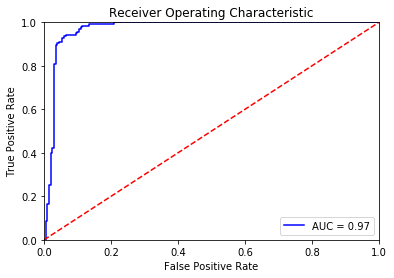

In [33]:
preds = proba_svc[:,1]
fpr, tpr, ths = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<hr>

### Deploy model to joblib

In [34]:
joblib.dump(svc_tuned, "model_svc_tuned")

['model_svc_tuned']

In [35]:
joblib.dump(scaler, "scale data")

['scale data']